In [1]:
import pandas as pd
from utils.utility_functions import *
from src.Limma import batchEffectCorrection
from inmoose.pycombat import pycombat_norm
import patsy
from src.MetNormalizer import MetNorm

# Limma

In [155]:
D = pd.read_csv("Data/2-peak_area_after_filling_missing_values.csv").set_index("position")
name = D.pop('name')
mz = D.pop('mz')
rt = D.pop('rt')
D = D.T
M = pd.read_csv("Data/sample_metadata_all_batches.csv").set_index("sample_name")
D = D[~D.index.str.contains("_B_")]
M = M[~M.index.str.contains("_B_")]
D = D.drop(index='AOU_S_0104')
M = M.drop(index='AOU_S_0104')
#D = D[detection(D,limit=0.30).index]
# D = TIC(D,scale=True)
# D = np.log2(D)


In [156]:
D = D[D.index.str.contains("_SP_") | D.index.str.contains("_S_")]
M = M[M.index.str.contains("_SP_") | M.index.str.contains("_S_")]
D=D.T
D.insert(0,"mz",mz)
D.insert(1,'rt',rt)
D = D.reset_index().rename(columns={'position':"name"})
D.to_csv("~/Projects/Metabolomics/MetNormalizer/sample_data_for_metnor_R.csv")
M  = M.rename(columns={"injection_order":"injection.order",'sample_type':'class'})
M.loc[M[M['class'] == "sp"].index,'class'] = "Subject"
M.loc[M[M['class'] != "sp"].index,'class'] = "QC"
M = M[['injection.order',"class"]].reset_index().rename(columns={'sample_name':'sample.name'})
M
M.to_csv("~/Projects/Metabolomics/MetNormalizer/sample_metadata_for_metnor_R.csv")
D

,name,mz,rt,AOU_SP_001,AOU_SP_010,AOU_S_0001,AOU_S_0081,AOU_S_0002,AOU_S_0082,AOU_S_0003,...,AOU_S_0077,AOU_S_0157,AOU_S_0078,AOU_S_0158,AOU_S_0079,AOU_S_0159,AOU_S_0080,AOU_S_0160,AOU_SP_009,AOU_SP_018
0,1,254.0588,6.475,4633218.0,4423504.0,44.0,44.0,44.0,44.0,44.0,...,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,4137596.0,4300507.0
1,2,149.0229,14.076,1161562.0,1291106.0,896320.0,891843.0,816745.0,847260.0,770101.0,...,703363.0,775698.0,662098.0,809774.0,760355.0,745988.0,689478.0,956517.0,1118976.0,1271043.0
2,3,116.0705,0.716,56210872.0,66674188.0,45020724.0,53393356.0,87842112.0,51445976.0,40132416.0,...,46681196.0,68055248.0,73332200.0,68829440.0,71719744.0,80738856.0,81517792.0,49990588.0,67066728.0,63187060.0
3,4,172.1330,4.879,14166810.0,13407357.0,44.0,44.0,44.0,44.0,44.0,...,44.0,44.0,44.0,44.0,44.0,44.0,44.0,83379512.0,13457992.0,12945250.0
4,5,279.1583,14.076,505266.0,469983.0,293538.0,326674.0,287761.0,297827.0,290459.0,...,253736.0,319443.0,234939.0,302635.0,242247.0,265869.0,253728.0,335504.0,439229.0,418968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,13927,102.9891,2.272,5152.0,44.0,912.0,9182.0,4433.0,1730.0,3670.0,...,9028.0,3055.0,4609.0,44.0,44.0,44.0,1990.0,44.0,6502.0,7029.0
13927,13928,162.9684,2.549,3267.0,1383.0,1494.0,44.0,2102.0,44.0,44.0,...,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0
13928,13929,104.9479,2.470,3340.0,2226.0,1455.0,44.0,4319.0,44.0,2607.0,...,44.0,44.0,44.0,1271.0,2362.0,44.0,1200.0,44.0,2414.0,3388.0
13929,13930,134.9680,5.073,1872.0,44.0,44.0,44.0,1676.0,2119.0,2197.0,...,1469.0,44.0,841.0,1944.0,44.0,44.0,1549.0,556.0,3851.0,1880.0


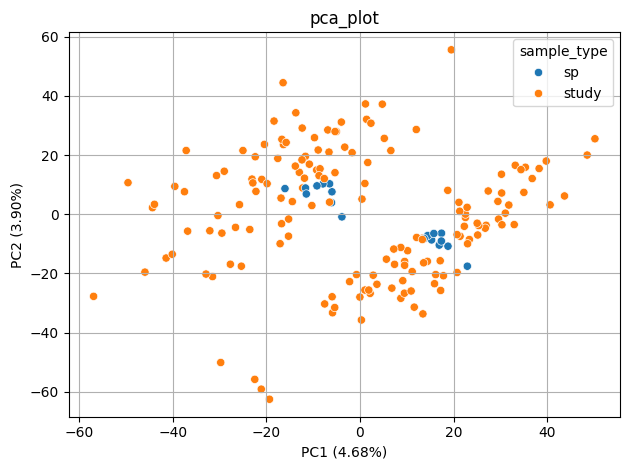

In [ ]:
pca_plot(D,M)

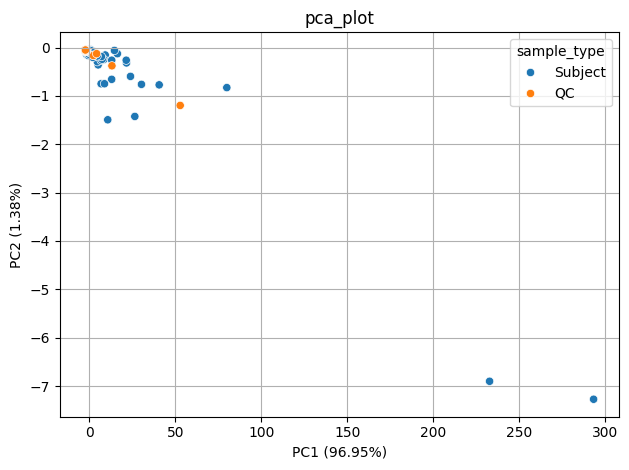

,name,S20,S30,S39,S49,S59,S69,S78,S2,S3,...,QC14,QC15,QC16,QC17,QC18,QC19,QC20,QC21,QC22,QC23
0,1,554201.414588,604294.667793,584520.817661,527564.572646,553538.556746,552310.232612,550577.776329,562930.193384,542953.318902,...,502990.367691,547028.327928,531567.948627,545380.213967,389393.338463,564737.061724,339432.011389,551996.585966,504079.890266,523981.210586
1,2,98054.509668,111595.914806,102747.151652,110718.613910,104026.682137,96565.676791,101562.621700,94391.244331,88533.271345,...,94993.613677,94789.258358,83495.217118,92155.465780,95248.064189,98378.819040,91941.791895,86823.272796,82543.079458,84054.755835
2,3,33791.434824,34713.886967,35005.951154,35541.962102,34846.384256,34683.880245,36115.088502,34674.666783,39332.699827,...,32793.626648,32786.606885,34449.622850,34998.211593,33327.548713,33016.954811,32855.779693,34790.399437,32850.047283,31673.327720
3,4,159582.501541,154719.722934,157859.942672,161362.000040,154541.320093,158790.450556,157610.566349,156861.222205,158639.178465,...,156467.391529,149500.708795,150541.386553,154985.126437,155041.744370,152556.987327,156095.082180,155039.587738,151010.550630,146574.297763
4,5,66743.557613,85894.062717,74709.185283,77697.046849,69381.596065,65140.725482,65892.837606,63410.679178,60356.896949,...,62855.444096,58660.772369,66781.297941,63261.232535,58998.333057,64498.496123,62507.446577,61384.749364,60114.384874,49316.875538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,1347,22822.345318,22705.121847,22008.539660,20838.126470,22971.345388,22964.061141,22044.205861,22219.826851,22705.854496,...,22439.774395,21543.865122,21941.623472,21935.590635,21927.182757,22672.588180,22127.926641,22474.920657,22853.739828,22026.245083
1347,1348,14267.821974,13078.249453,11149.434855,12738.379783,13354.137829,11624.511702,12637.566405,11970.705024,15037.952977,...,20651.984860,17069.692726,17905.482146,38869.574559,896.504829,13171.827682,18968.589944,12123.250837,17560.320955,20820.847002
1348,1349,9196.167797,9132.867284,8877.524617,8621.931116,8517.783716,7925.457705,7613.487241,8404.158692,7502.479801,...,7093.810729,6727.193090,5518.885391,6943.831049,7256.257786,6845.470913,7399.137860,5659.206017,7507.531760,7031.498607
1349,1350,22873.969868,19743.175450,20433.169472,19601.214469,20495.913026,20289.334860,19402.321240,20212.618218,20994.687349,...,19402.302805,20102.725242,20108.169726,20103.969991,20534.779111,20581.407345,20788.660748,20121.784704,19760.049004,20921.131207


In [154]:
D = pd.read_csv("/Users/jaileru/Projects/Metabolomics/MetNormalizer/svr_normalization_result/data_svr_normalization.csv").drop(columns=['Unnamed: 0','mz','rt','sample.nor.rsd','QC.nor.rsd'])
m = pd.DataFrame(D.columns)
m = m.loc[1:,:]
m = m.rename(columns={0:'sample_name'})
m.loc[m[m['sample_name'].str.contains("S")].index,'sample_type'] = 'Subject'
m.loc[m[m['sample_name'].str.contains("QC")].index,'sample_type'] = 'QC'


pca_plot(D,m)

D

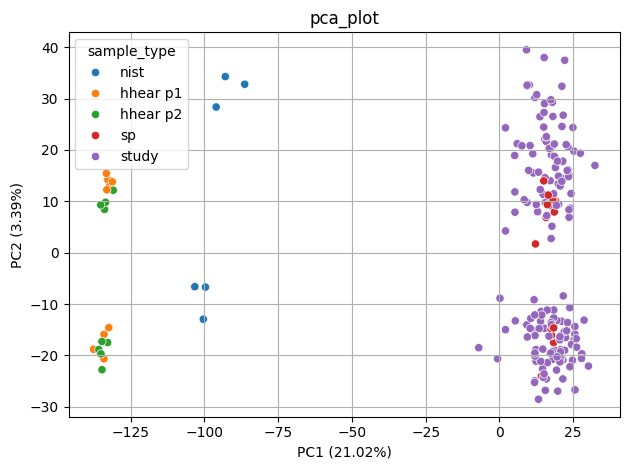

In [45]:
pca_plot(D,M)

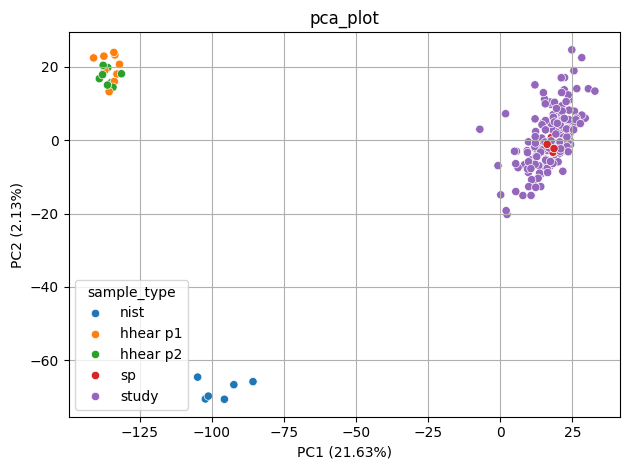

In [46]:
batch = M.loc[D.index,'batch']
combat = pycombat_norm(D.T,batch).T
pca_plot(combat,M)

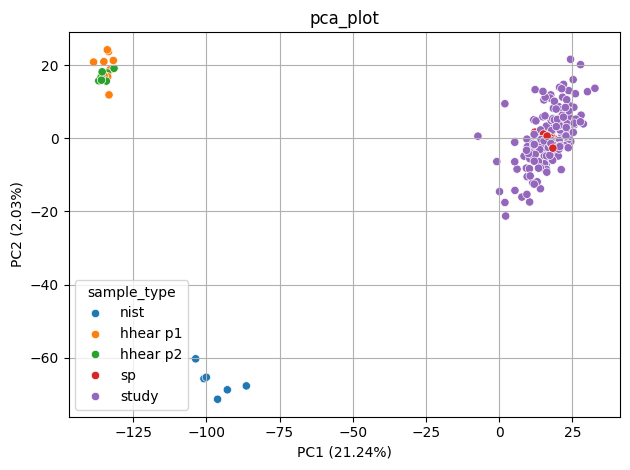

In [47]:
limma = batchEffectCorrection(D.T,M)
pca_plot(limma,M,hue='sample_type')

In [81]:
limmar = pd.read_csv("Data/limma_ref.csv").rename(columns={"Unnamed: 0":"name"}).set_index("name").T

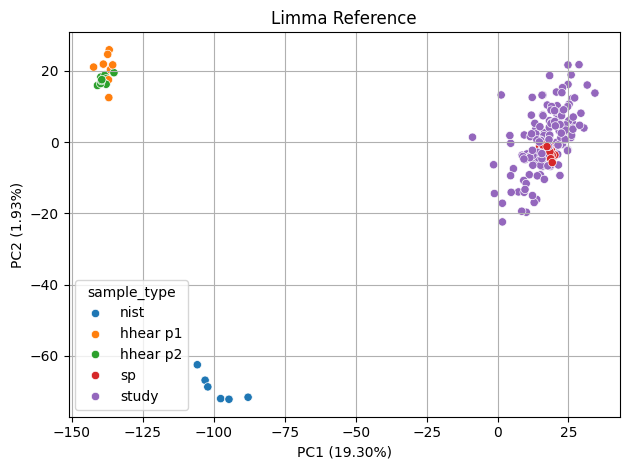

In [82]:
pca_plot(limmar,M,title='Limma Reference')

# MetNormalizer

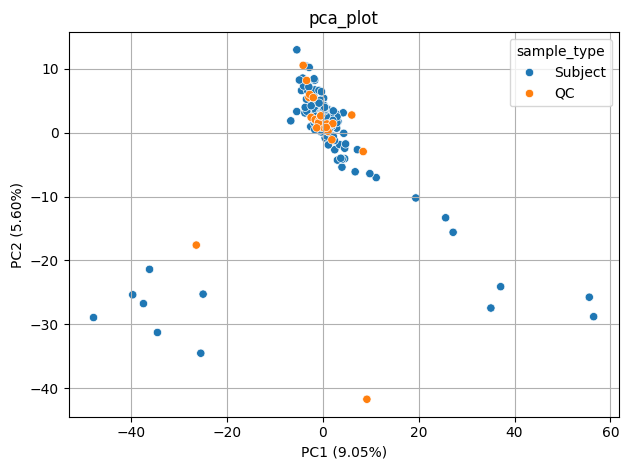

In [2]:
D = pd.read_csv("/Users/jaileru/Projects/Metabolomics/MetNormalizer/data.csv").drop(columns=["mz",'rt']).set_index("name").T
M = pd.read_csv("/Users/jaileru/Projects/Metabolomics/MetNormalizer/sample.info.csv").rename(columns={"sample.name":"sample_name","class":"sample_type"}).set_index("sample_name")
metNor = pd.read_csv("/Users/jaileru/Projects/Metabolomics/MetNormalizer/svr_normalization_result/data_svr_normalization.csv").drop(columns=["Unnamed: 0",'mz','rt','sample.nor.rsd','QC.nor.rsd']).set_index("name")
pca_plot(metNor.T,M)

In [3]:
D.index= D.index.str.replace("QC","_SP_")

In [4]:
metnorm = MetNorm(D,M,cv=False)

In [5]:
results = metnorm.fit_transform()

In [6]:
results.index = results.index.str.replace("_SP_","QC")

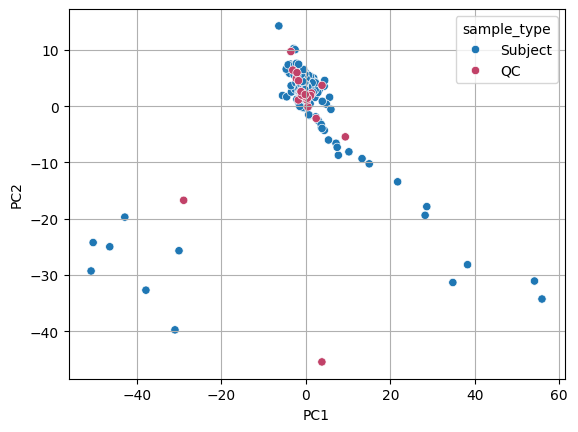

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
pca = PCA(n_components=2)

pca_df = pd.DataFrame(pca.fit_transform(StandardScaler().fit_transform(results)),index=results.index,columns=["PC1","PC2"])

pca_df["sample_type"] = M['sample_type']


sns.scatterplot(pca_df[pca_df['sample_type'] == 'Subject'],x='PC1',y='PC2',hue='sample_type')
sns.scatterplot(pca_df[pca_df['sample_type'] != 'Subject'],x='PC1',y='PC2',hue='sample_type',palette='flare')
plt.grid(True)

In [157]:
import numpy as np

In [160]:
type(np.array([0,1,0]))

numpy.ndarray